# Introduction to TimeSeries

A time series is a collection of observations of well-defined data items obtained through repeated measurements over time. An observed time series can be decomposed into three components: the trend (long term direction), the seasonal (systematic, calendar related movements) and the irregular (unsystematic, short term fluctuations)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

In [2]:
import statsmodels.api as sm

In [3]:
### Importing The DataSet 
train = pd.read_csv('data/Train.csv')
test = pd.read_csv('data/Test.csv')
train_original=train.copy() 
test_original=test.copy()

In [4]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [5]:
train.shape, test.shape

((18288, 3), (5112, 2))

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


In [7]:
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime, format='%d-%m-%Y %H:%M')

In [8]:
for df in (train, test, test_original, train_original):
    df['year']=df.Datetime.dt.year 
    df['month']=df.Datetime.dt.month 
    df['day']=df.Datetime.dt.day
    df['Hour']=df.Datetime.dt.hour

In [9]:
train = train \
    .set_index('Datetime')\
    .drop('ID', axis = 1)

test = test \
    .set_index('Datetime')\
    .drop('ID', axis = 1)

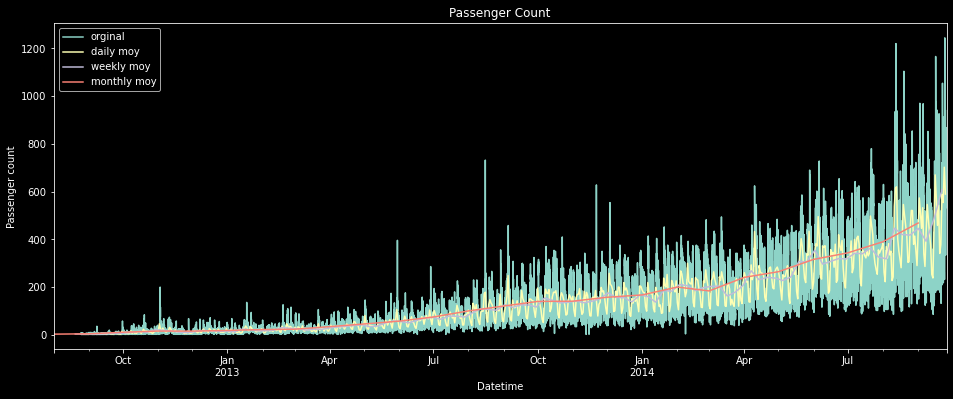

In [10]:
plt.style.use('dark_background')
train.Count.plot(figsize = (16,6), title = 'Passenger Count', xlabel = "Time(year-month)", ylabel = "Passenger count",
                label = "orginal")
train.Count.resample('D').mean().plot(label = "daily moy")
train.Count.resample('W').mean().plot(label = "weekly moy")
train.Count.resample('MS').mean().plot(label = "monthly moy")
plt.legend()
plt.show()

* There is an increasing trend in the series
* At certain points there is a sudden increase in the number of counts (possible reason behind this could be that on particular day, due to some event the traffic was high).

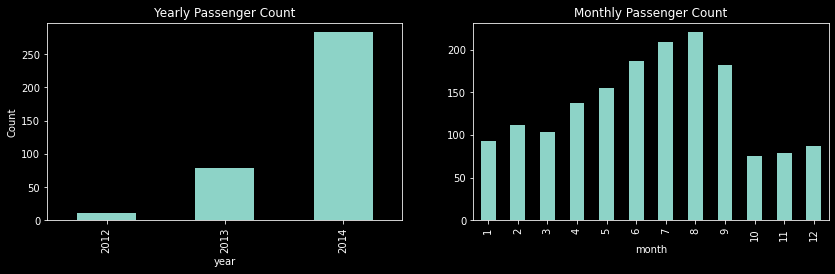

In [11]:
plt.subplot(2,2,1)
train.groupby('year')['Count'].mean().plot(kind = 'bar', figsize = (14,8), title="Yearly Passenger Count", ylabel ="Count")
plt.subplot(2,2,2)
train.groupby('month')['Count'].mean().plot(kind = 'bar', figsize = (14,8), title="Monthly Passenger Count")
plt.show()

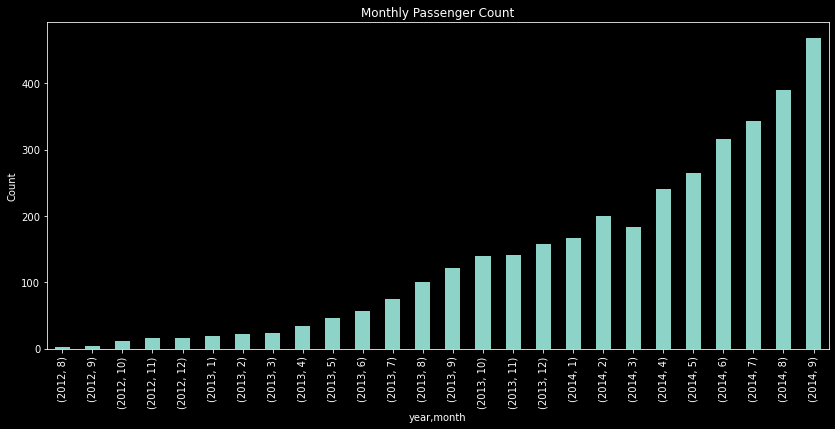

In [12]:
train.groupby(['year','month'])['Count'].mean().plot(kind = 'bar', 
                                                     figsize = (14,6),
                                                     title="Monthly Passenger Count",
                                                     ylabel ="Count")
plt.show()

In [13]:
train.to_pickle("data/train.pkl")
test.to_pickle("data/test.pkl")